In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

# Preprocessing the image data for training and testing set
## and show the first photo of 25 chosen people

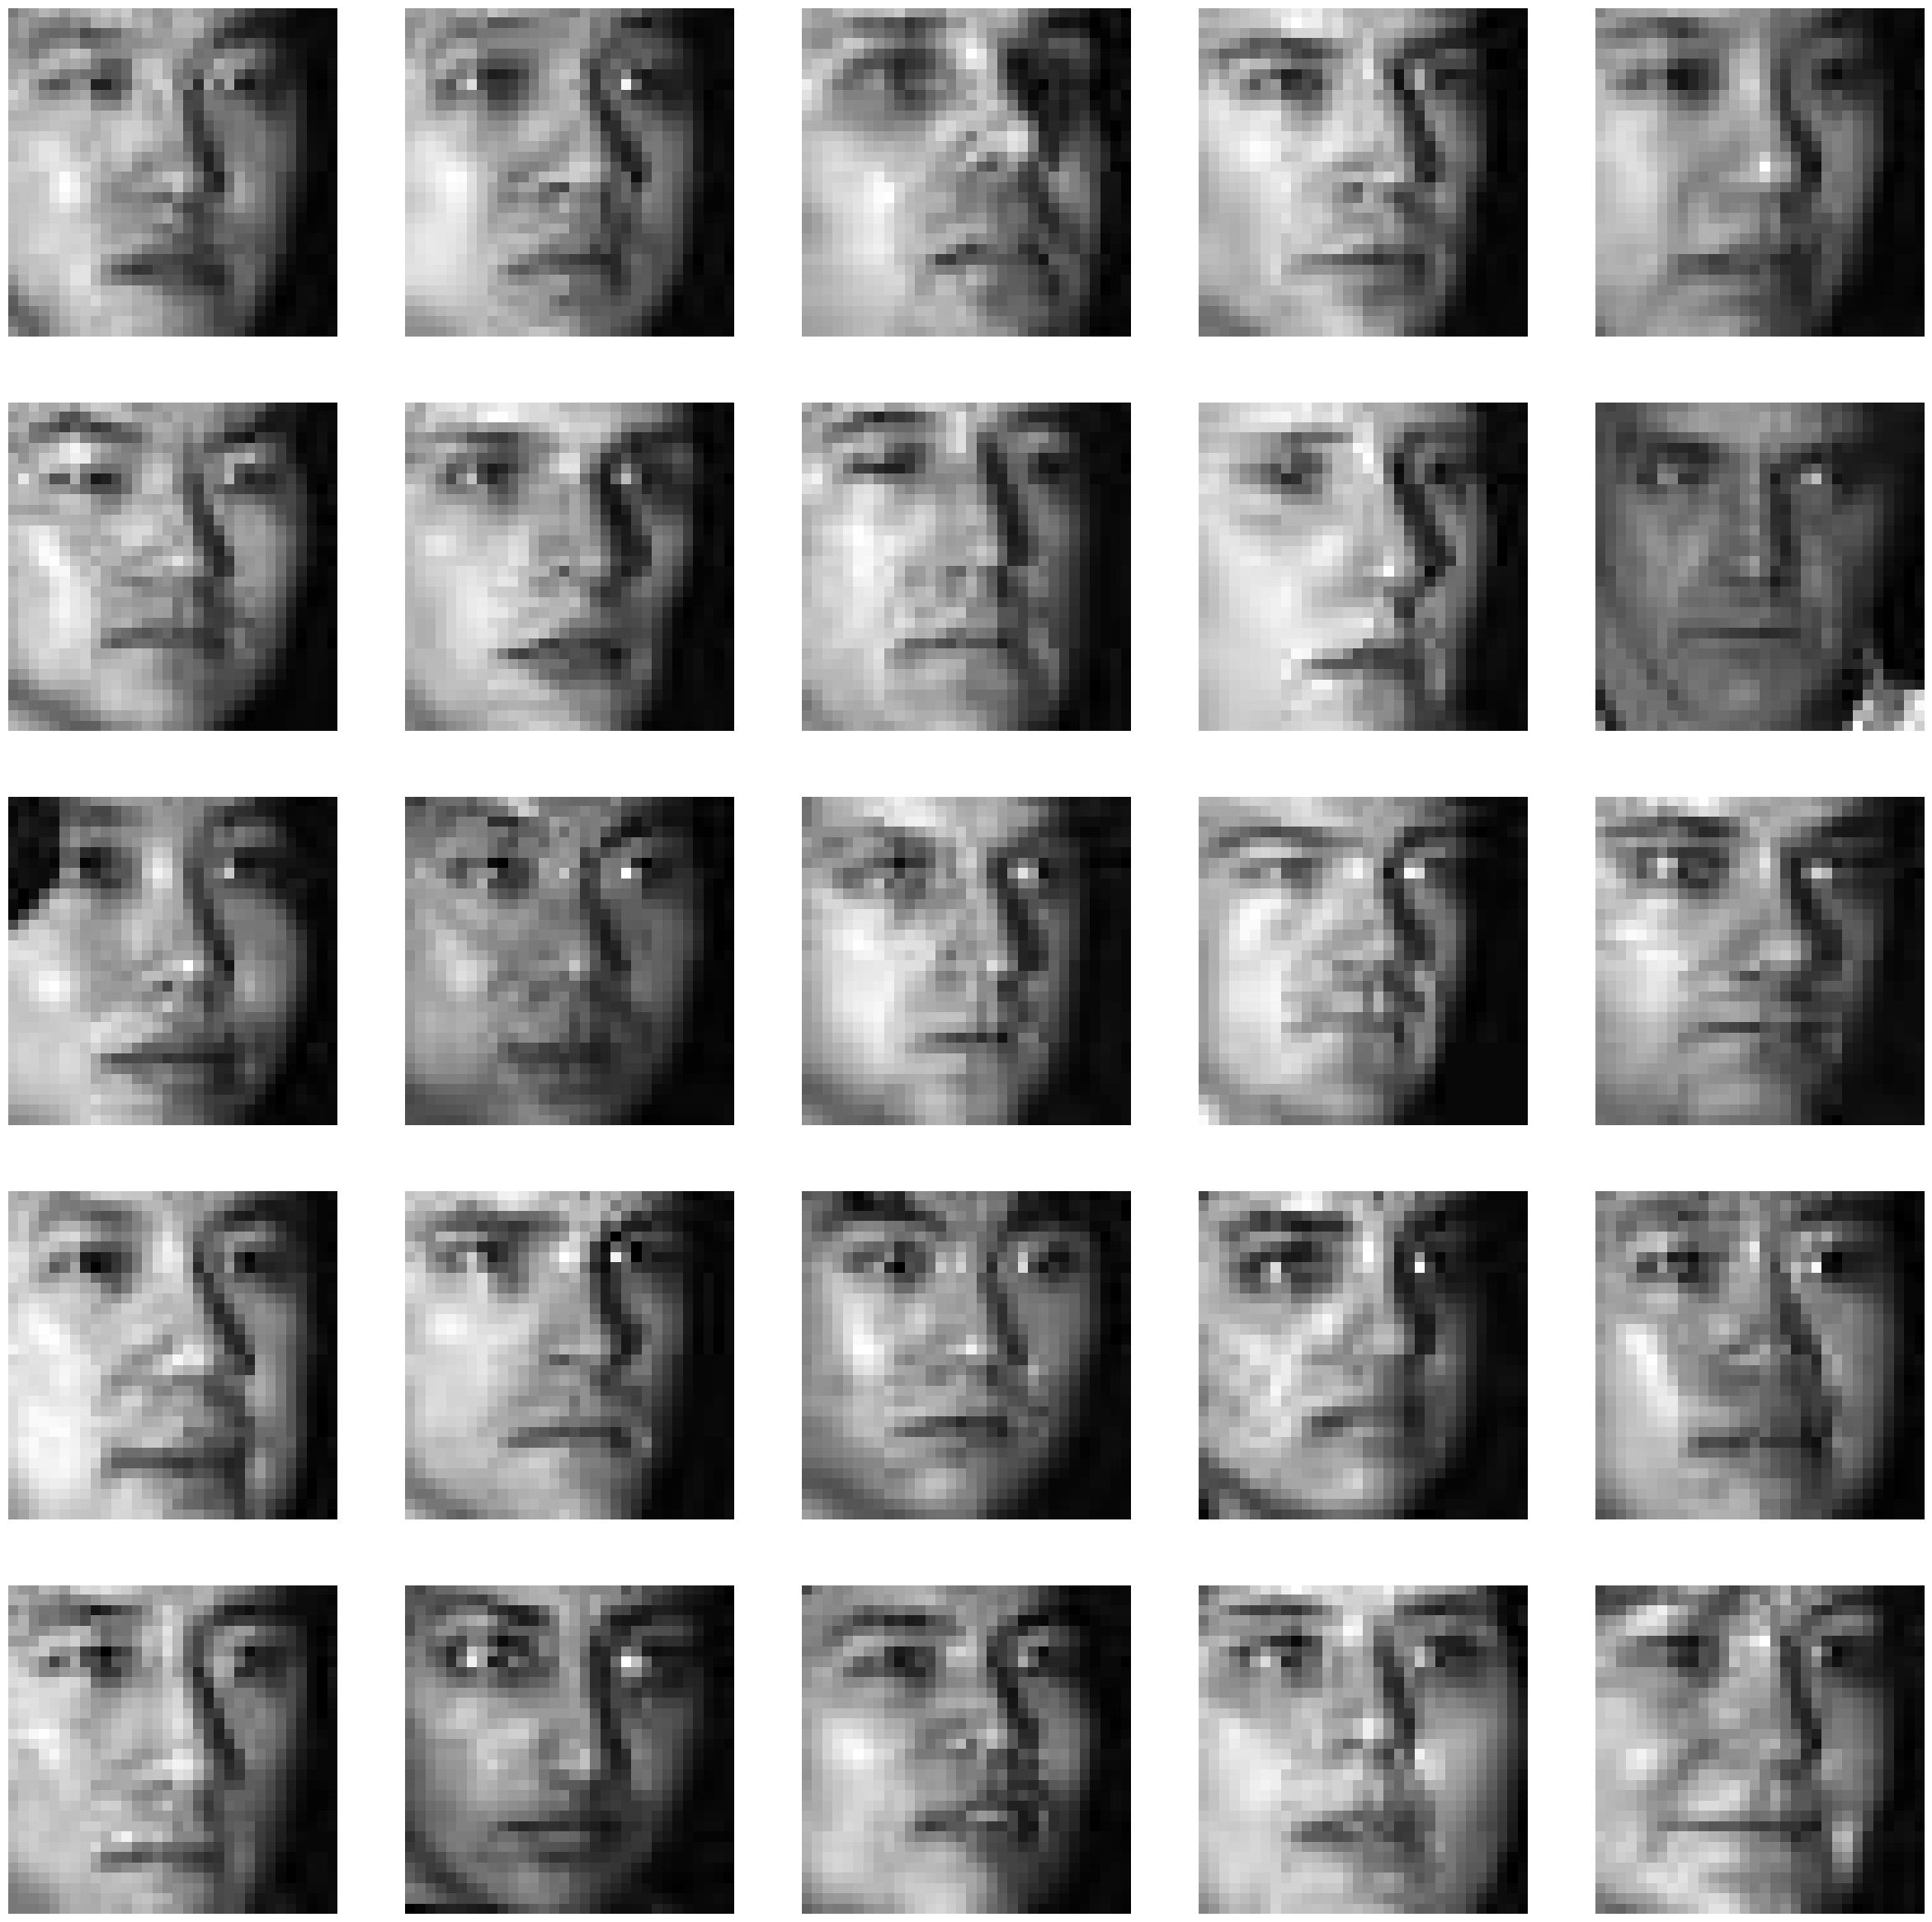

In [2]:
cmu_img = []  # training set of CMU photos
cmu_train_label = []  # label of the training set
cmu_test = []  # test set
cmu_test_true_label = []
sample = 25  # select training photos from 25 people
random.seed(1)  # random seed
plt.figure(figsize=(30, 30))
random_list = random.sample(range(1, 69), 25)
data_number = sample * 20
each_number = int(data_number / sample)
each_test_number = int(each_number*7/10) 
random_list_photo_number = random.sample(range(1, 171), each_number)
# print(random_list_photo_number)
# print(each_test_number)
# decide the training and test image set
for i in range(1, sample+1):
    for j in range(1, each_test_number + 1):
        cmu_img.append(cv2.imread(
            "./photos/PIE_set/"+str(random_list[i-1])+"/"+str(random_list_photo_number[j-1])+".jpg", cv2.IMREAD_GRAYSCALE))
        cmu_train_label.append(random_list[i-1])
    for j in range(each_test_number + 1, each_number + 1):
        cmu_test.append(cv2.imread(
            "./photos/PIE_set/"+str(random_list[i-1])+"/"+str(random_list_photo_number[j-1])+".jpg", cv2.IMREAD_GRAYSCALE))
        cmu_test_true_label.append(random_list[i-1])
    plt.subplot(5, 5, i)
    plt.imshow(cmu_img[int(each_test_number*(i-1))], cmap='gray')
    plt.axis("off")

plt.show()

# Load and show own photos

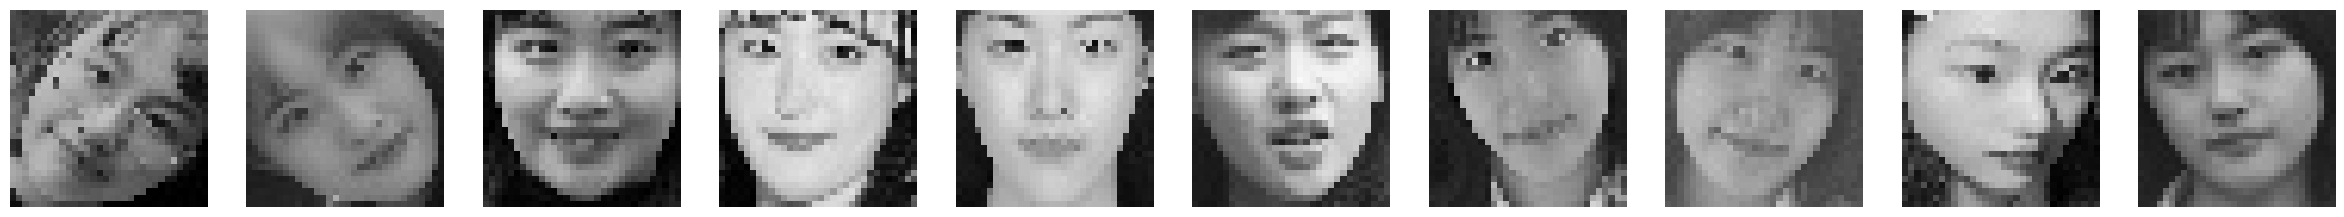

<class 'numpy.ndarray'>
(32, 32)
[[75 91 98 ...  4  5  5]
 [88 99 88 ...  6  7  6]
 [87 97 79 ...  8  7  6]
 ...
 [55 65 77 ...  6  4  4]
 [69 62 63 ...  5  4  6]
 [88 68 58 ...  3  3  7]]


In [3]:
# add own photos which are taken from my girlfriend
for i in range(1, 8):
    cmu_img.append(cv2.imread("./photos/OWN_set/" +
                   str(i)+".jpg", cv2.IMREAD_GRAYSCALE))
    cmu_train_label.append(69)
for i in range(8, 11):
    cmu_test.append(cv2.imread("./photos/OWN_set/" +
                    str(i)+".jpg", cv2.IMREAD_GRAYSCALE))
    cmu_test_true_label.append(69)
    
plt.figure(figsize=(30, 30))
for i in range(1,11):
    plt.subplot(1, 10, i)
    plt.imshow(cv2.imread("./photos/OWN_set/" +
                   str(i)+".jpg"), cmap='gray')
    plt.axis("off")
plt.show()
print(type(cmu_img[0]))
print(cmu_img[0].shape)
print(cmu_img[0])
# print(len(cmu_train_label))
cmu_train_label = np.array(cmu_train_label)  # as np.ndarray
cmu_test_true_label = np.array(cmu_test_true_label)
#print(random_list)
#print(random_list_photo_number)

# Centre the data points and reduce dimentionality

In [4]:
# calculate the mean value
cmu_means = np.mean(cmu_img, axis=0)

# centrolize the data
data_len = len(cmu_img)
X_img = np.zeros((1024, data_len))

# convert list to array d x n where d = 1024 and n is the number of data points
for i in range(data_len):
    cmu_img[i] = cmu_img[i] - cmu_means
    cmu_img[i] = np.reshape(cmu_img[i], (1024, 1))
    X_img[:, i] = cmu_img[i][:, 0]


cmu_means = np.reshape(cmu_means, (1024, 1))
# SVD decomposition
u, s, vh = np.linalg.svd(np.dot(X_img, X_img.T), full_matrices=False)

# use first 200 dimention


D = 200
# print(u[:,:D].shape)
cmu_reduced = np.zeros((D, data_len))

projection = np.dot(u[:, :D].T, X_img)
cmu_reduced = projection

print(cmu_reduced.shape)


(200, 357)


# Visualize the projection data in 2D and 3D

14


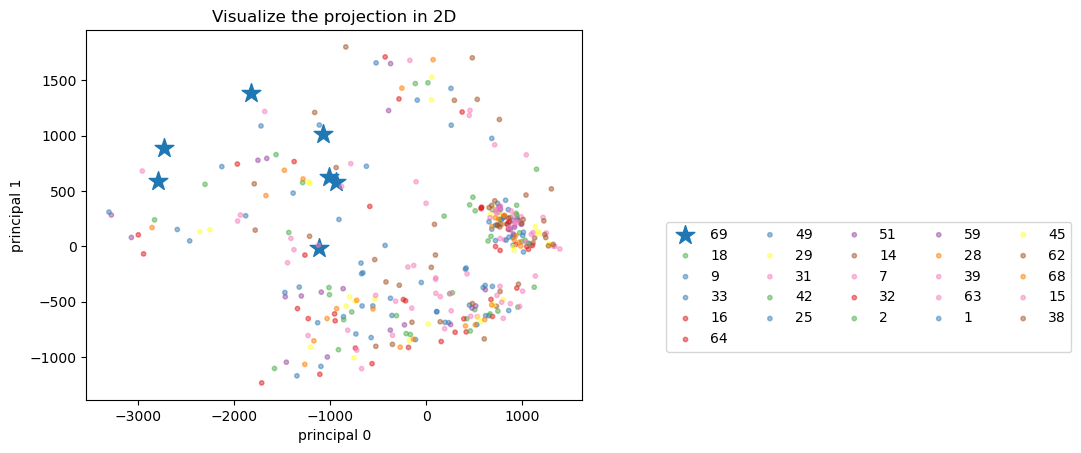

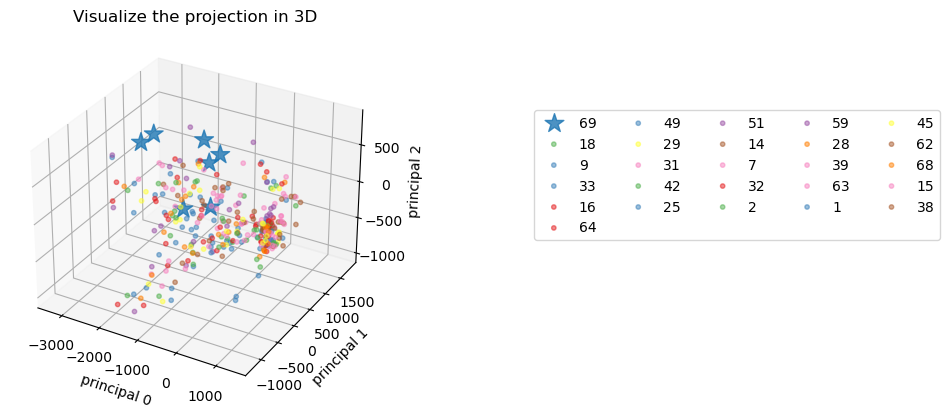

The first 3 principal contribute to features with percentage of:
[0.52660086 0.18644853 0.04328427]


In [5]:
# 2d
plot_2d = plt.figure()
ax = plot_2d.add_subplot()
print(each_test_number)
ax.scatter(projection[0, sample*each_test_number:], projection[1, sample*each_test_number:],
           marker="*", alpha=1, s=200, label=69)  # own photos
for i in range(25):
    ax.scatter(projection[0, i*each_test_number:(i+1)*each_test_number], projection[1, i*each_test_number:(i+1)*each_test_number], color=plt.cm.Set1(
        cmu_train_label[i*each_test_number:(i+1)*each_test_number] % 8), alpha=0.5, s=10, label=random_list[i])

ax.set_title("Visualize the projection in 2D")
ax.set_xlabel("principal 0")
ax.set_ylabel("principal 1")
lgd = ax.legend(ncol=np.int_(25 / 5), bbox_to_anchor=(2, 0.5))
# 3d

plot_3d = plt.figure()
ax = plot_3d.add_subplot(projection="3d")
ax.scatter(projection[0, sample*each_test_number:], projection[1, sample*each_test_number:],
           projection[2, sample*each_test_number:], marker="*", alpha=0.8, s=200, label=69)

for i in range(25):
    ax.scatter(projection[0, i*each_test_number:(i+1)*each_test_number], projection[1, i*each_test_number:(i+1)*each_test_number], projection[2, i*each_test_number:(i+1)*each_test_number],
               color=plt.cm.Set1(cmu_train_label[i*each_test_number:(i+1)*each_test_number] % 8), alpha=0.5, s=10, label=random_list[i])

ax.set_title("Visualize the projection in 3D")
ax.set_xlabel("principal 0")
ax.set_ylabel("principal 1")
ax.set_zlabel("principal 2")
lgd = ax.legend(ncol=np.int_(25 / 5), bbox_to_anchor=(1.4, 0.8))

plt.show()

print('The first 3 principal contribute to features with percentage of:\n'+str(s[:3]/sum(s)))

# Show first 3 eigen faces

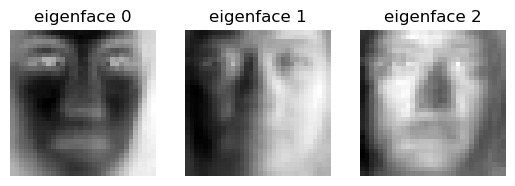

In [6]:
def eigen_face_normalize(v: np.ndarray) -> np.ndarray:
    v_max = v.max()
    v_min = v.min()
    v_normalized = (np.subtract(v, v_min))/(v_max-v_min)
    return v_normalized * 255


shown_eig_face_n = 3
for i in range(shown_eig_face_n):
    u_eig = eigen_face_normalize(u[:, i])
    plt.subplot(1, shown_eig_face_n, i+1)
    plt.imshow(u_eig.reshape((32, 32)), cmap='gray')
    plt.axis("off")
    plt.title("eigenface "+str(i))

plt.show()

# Centre the testing data and reduce dimentionality

In [7]:
test_data_len = len(cmu_test)
test_mean = np.mean(cmu_test,axis=0)
cmu_test_centred = np.zeros((1024, test_data_len))
for i in range(test_data_len):
    cmu_test[i] = cmu_test[i] - test_mean
    cmu_test[i] = np.reshape(cmu_test[i], (1024, 1))
    cmu_test_centred[:, i] = cmu_test[i][:, 0]

# print(cmu_test_centred.shape)
# print(cmu_train_label)
# print(cmu_train_label.shape)


test_reduced = np.zeros((D, data_len))
projection = np.dot(u[:, :D].T, cmu_test_centred)
test_reduced = projection

# Apply K-nearest neighbors with K=1

In [8]:
for d in [40, 80, 200]:
    estimate_label = []
    k = 1
    for i in range(test_data_len-3):
        dist = []
        for j in range(data_len):
            dist.append(np.linalg.norm(test_reduced[:d, i]-cmu_reduced[:d, j]))
        a = cmu_train_label[np.argsort(dist)[:k]]

        estimate_label.append(np.argmax(np.bincount(a)))

    count = 0
    for i in range(test_data_len-3):
        if estimate_label[i] != cmu_test_true_label[i]:
            count = count+1
    accuracy = (test_data_len-count)/test_data_len
    print('accuracy using first '+str(d) +
          ' principle components and KNN with k = '+str(k)+' is: '+str(round(100*accuracy, 2))+'%')

accuracy using first 40 principle components and KNN with k = 1 is: 51.63%
accuracy using first 80 principle components and KNN with k = 1 is: 54.9%
accuracy using first 200 principle components and KNN with k = 1 is: 55.56%


# Apply K-nearest neighbors with K=1 for own photos tesing

In [9]:
for d in [40, 80, 200]:
    estimate_label = []
    k = 1
    for i in range(test_data_len-3, test_data_len):
        dist = []
        for j in range(data_len):
            dist.append(np.linalg.norm(test_reduced[:d, i]-cmu_reduced[:d, j]))
        a = cmu_train_label[np.argsort(dist)[:k]]

        estimate_label.append(np.argmax(np.bincount(a)))

    count = 0
    for i in range(test_data_len-3, test_data_len):
        if estimate_label[i-(test_data_len-3)] != cmu_test_true_label[i]:
            count = count+1
    accuracy = (3-count)/(3)
    print('accuarcy of testing own photos is '+str(accuracy*100)+'%')

accuarcy of testing own photos is 0.0%
accuarcy of testing own photos is 0.0%
accuarcy of testing own photos is 0.0%
